In [1]:
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import numpy as np
import matplotlib.pylab as plt

from viz import (build_graph_viz, 
                 build_node_trace, 
                 build_edge_trace, 
                 simplex_plot, 
                 make_axis)
                   
from utils import (get_edges, 
                   get_nodes, 
                   get_degree, 
                   build_all_to_all, 
                   compute_zdot,
                   compute_drift,
                   compute_social_term,
                   compute_udot,
                   split_agent_option_matrix,
                   euler_integration,
                   build_homogeneous_A,
                   run_homogeneous_simulation,
                   map_to_simplex,
                   generate_random_relative_options)

# Cooperative and Competitive Homogeneous Agents

# Figure 2(a) and 2(b)

In [2]:
# hyperparameters 
dt = 1e-2
num_agents = 8
num_options = 2

alpha = 0.2
beta = 0.1   # Should be negative
d = 1.
u = 3.
b = 0.

T_consensus = 10
gamma_consensus = 0.2
delta_consensus = -0.1

T_dissensus = 30
gamma_dissensus = -0.1
delta_dissensus = 0.2

A_tilde = np.ones((num_agents, num_agents)) 
# A_tilde = np.random.randint(2, size=(num_agents, num_agents))
# Opinion matrix of agent i, opinion j
Z = generate_random_relative_options(num_agents, num_options)

Text(0, 0.5, 'z_i')

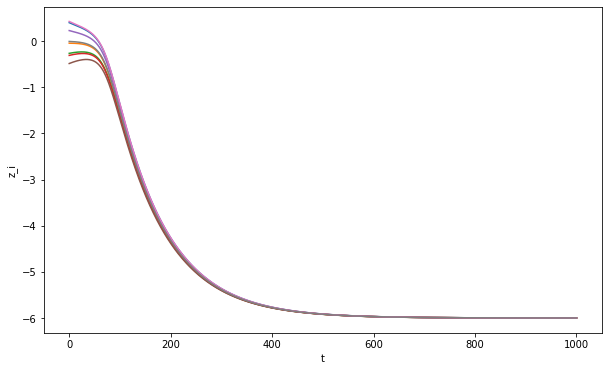

In [3]:
Z_t = run_homogeneous_simulation(T_consensus, 
                        dt, 
                        num_agents, 
                        num_options, 
                        gamma_consensus, 
                        delta_consensus,
                        alpha,
                        beta,
                        d,
                        u,
                        b,
                        A_tilde,
                        Z)

plt.figure(figsize=[10,6])
plt.plot(Z_t[:,:,0]) # Question: why do we only plot option 0?
plt.xlabel('t')
plt.ylabel('z_i')

Text(0, 0.5, 'z_i')

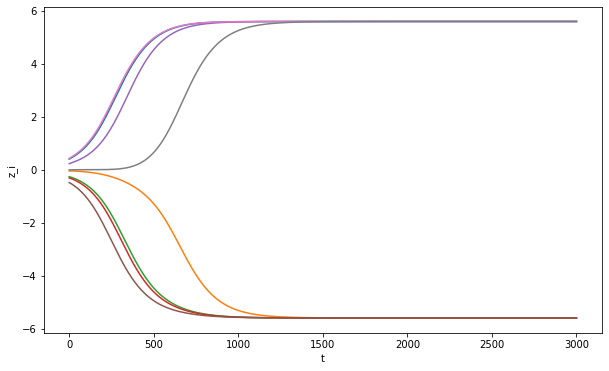

In [4]:
Z_t = run_homogeneous_simulation(T_dissensus, 
                        dt, 
                        num_agents, 
                        num_options, 
                        gamma_dissensus, 
                        delta_dissensus,
                        alpha,
                        beta,
                        d,
                        u,
                        b,
                        A_tilde,
                        Z)

plt.figure(figsize=[10,6])
plt.plot(Z_t[:,:,0])
plt.xlabel('t')
plt.ylabel('z_i')